In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline

<h1>Classification Tree </h1>


Reading Data

In [2]:
data = pd.read_excel('../../../Data/TreeData.xls')
data.head()

,X1,X2,Y
0,0.60,0.80,1
1,0.80,0.85,0
2,0.90,0.90,1
3,0.55,0.90,1
4,0.50,0.50,0


Finding out more info on the tree methods

In [3]:
print(tree.DecisionTreeClassifier())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


constructing the tree

In [4]:
X = np.array(data.loc[:,['X1','X2']])
Y = np.array(data['Y'])
Y =  Y.reshape(len(Y),1)
tr = tree.DecisionTreeClassifier()
tr.fit(X,Y);


In [5]:
x_test = np.array([0.5, 0.5])
x_test = x_test.reshape(1,2)
print('The predicted class is : {n:0.0f}'.format(n=tr.predict(x_test)[0]))
print('The class probabilities are:')
for i in np.arange(0,len(tr.predict_proba(x_test)[0]),1):
    print(tr.predict_proba(x_test)[0][i])


The predicted class is : 0
The class probabilities are:
1.0
0.0


In [6]:
x_step =0.001
x1_min, x1_max = X[:, 0].min() , X[:, 0].max()
x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, x_step),np.arange(x2_min, x2_max, x_step))
y = tr.predict(np.c_[xx1.ravel(), xx2.ravel()])
y = y.reshape(xx1.shape)

making a contour plot

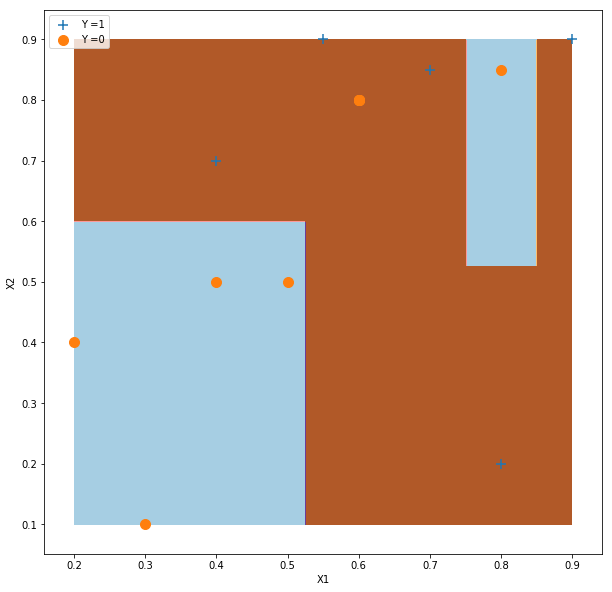

In [7]:
fig = plt.figure(figsize=(10,10))
cs = plt.contourf(xx1, xx2, y,cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
idx = Y ==1
plt.scatter(x=X[np.where(idx),0],y=X[np.where(idx),1],label='Y =1',s=100,marker='+')
idx = Y ==0
plt.scatter(x=X[np.where(idx),0],y=X[np.where(idx),1],label='Y =0',s=100,marker='o')
plt.legend();